In [1]:
#Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip


In [8]:
#load the test dataset
dftest=pd.read_csv("test.csv")

In [12]:
columns=list(dftest.columns.values)

In [18]:
columns.insert(1,'click')

In [22]:
columns


['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [2]:
#read the train dataset 
df = pd.read_csv("train_sample.csv")

In [20]:
df.columns = columns
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,14237893487069276198,0,14102915,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17614,320,50,1993,2,1063,100084,33
1,1256834335867016987,0,14102205,1005,0,bb4524e7,d733bbc3,28905ebd,ecad2386,7801e8d9,...,1,0,21790,320,50,2513,3,35,100188,68
2,4768871205625579777,1,14102114,1002,0,85f751fd,c4e18dd6,50e219e0,255a58c8,7801e8d9,...,0,0,21747,320,50,2504,3,41,100160,111
3,2813443321480785661,0,14103009,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,2,23950,320,50,2745,2,163,100176,255
4,10449362658884413293,0,14102717,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17264,320,50,1872,3,39,-1,23


In [3]:
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
df['hour']=df['hour'].parse_date

AttributeError: 'Series' object has no attribute 'parse_date'

In [21]:
print(df.shape)


(1999999, 24)


In [5]:
import numpy as np
#column data types
types_train = {
    'id': np.dtype(int),
    'click': np.dtype(int),
    'hour': np.dtype(int),
    'C1': np.dtype(int),
    'banner_pos': np.dtype(int),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(int),
    'device_conn_type': np.dtype(int),
    'C14': np.dtype(int),
    'C15': np.dtype(int),
    'C16': np.dtype(int),
    'C17': np.dtype(int),
    'C18': np.dtype(int),
    'C19': np.dtype(int),
    'C20': np.dtype(int),
    'C21':np.dtype(int)
}


In [6]:


parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
df_train = pd.read_csv("train_sample.csv",parse_dates = ['hour'], date_parser = parse_date,dtype=types_train)


<ipython-input-6-ac32ae3cebda>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


In [25]:
#check the shape of the train dataset
#had to divide the data set as I was unable to read 5GB data . divided it into 5 parts and working on 1GB dataset to 
#figur out EDA
print(df_train.shape)

(2000000, 24)


In [55]:
#check first few rows to analyze the data set 
df_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day_of_week
0,-1313665075,0,2014-10-24 06:00:00,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,...,0,16615,320,50,1863,3,39,-1,23,<built-in method day_name of Timestamp object ...
1,-560158682,0,2014-10-29 15:00:00,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,0,17614,320,50,1993,2,1063,100084,33,<built-in method day_name of Timestamp object ...
2,1658722075,0,2014-10-22 05:00:00,1005,0,bb4524e7,d733bbc3,28905ebd,ecad2386,7801e8d9,...,0,21790,320,50,2513,3,35,100188,68,<built-in method day_name of Timestamp object ...
3,1323747585,1,2014-10-21 14:00:00,1002,0,85f751fd,c4e18dd6,50e219e0,255a58c8,7801e8d9,...,0,21747,320,50,2504,3,41,100160,111,<built-in method day_name of Timestamp object ...
4,1821290237,0,2014-10-30 09:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,2,23950,320,50,2745,2,163,100176,255,<built-in method day_name of Timestamp object ...


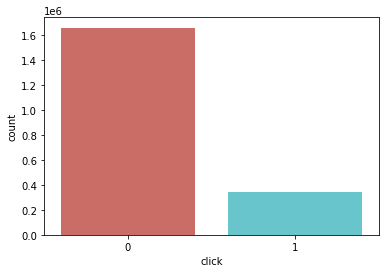

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='click',data=df_train, palette='hls')
plt.show();

In [9]:
#check percentage of clicks vs non clicks. we can see that 17.3% clicks and 82.6 % non clicks are there.
df_train['click'].value_counts()/len(df_train)

0    0.826199
1    0.173801
Name: click, dtype: float64

In [32]:
#Find missing data
count_missing = df_train.isnull().sum()

In [33]:
missing_value_df = pd.DataFrame({'Count Missing': count_missing}) 

In [34]:
missing_value_df

,Count Missing
id,0
click,0
hour,0
C1,0
banner_pos,0
site_id,0
site_domain,0
site_category,0
app_id,0
app_domain,0


In [35]:
cor = df_train.corr()

In [36]:
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

<AxesSubplot:>

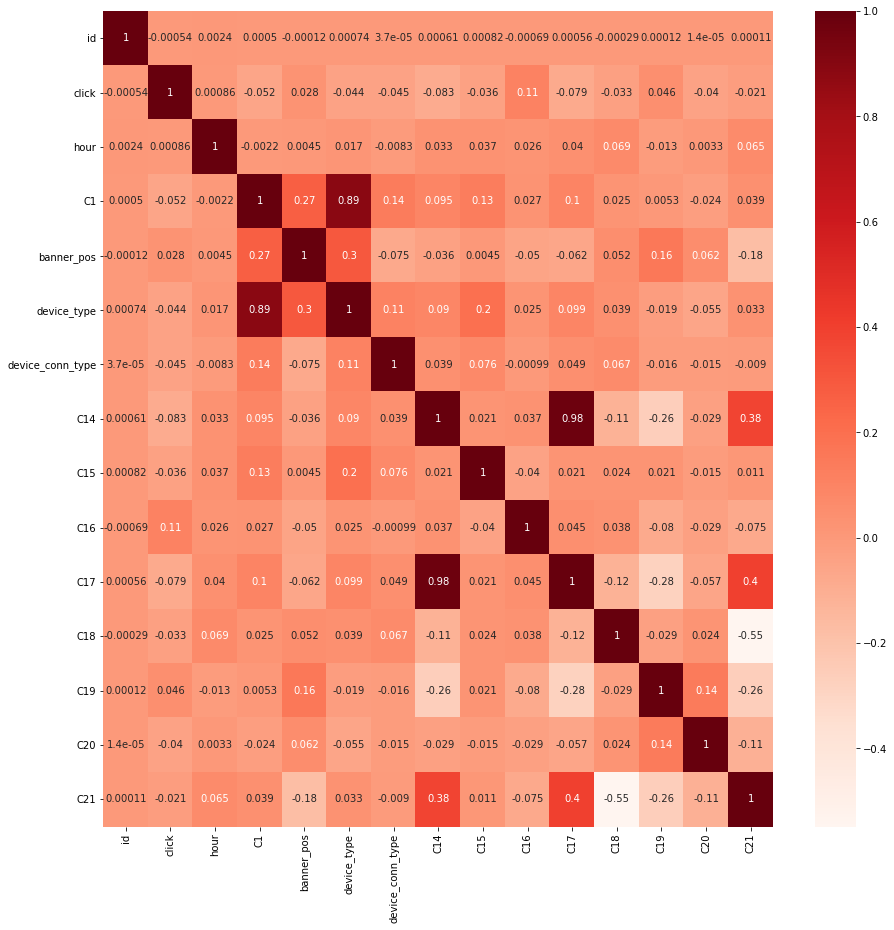

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,cmap = plt.cm.Reds)
plt.show()

In [41]:
#DROP one of the columns from the highly co-related pairs.
drop_columns =['C1','C17']
df_train = df_train.drop(columns=drop_columns, axis=1)

In [42]:
print(df_train.shape)

(4999999, 22)


In [43]:
count_clicked = (df_train['click'] == 1 ).sum()
count_not_clicked= 4999999 - count_clicked
print (count_clicked,count_not_clicked)

869006 4130993


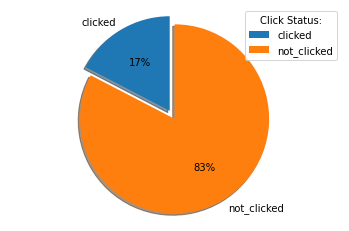

In [50]:
#lets plot 
click_status = ['clicked','not_clicked']
data =[count_clicked,count_not_clicked]
explode =(0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(data,explode=explode,labels = click_status,autopct='%2.2g%%',shadow = True,startangle =90)
ax1.axis ('equal')
plt.legend(title='Click Status:')
plt.show()


In [51]:
 (df_train['click'] == 1 ).head()
    

0    False
1    False
2    False
3    False
4    False
Name: click, dtype: bool

In [51]:
df_train.head(100)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,-1313665075,0,2014-10-24 06:00:00,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,...,1,0,16615,320,50,1863,3,39,-1,23
1,-560158682,0,2014-10-29 15:00:00,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17614,320,50,1993,2,1063,100084,33
2,1658722075,0,2014-10-22 05:00:00,1005,0,bb4524e7,d733bbc3,28905ebd,ecad2386,7801e8d9,...,1,0,21790,320,50,2513,3,35,100188,68
3,1323747585,1,2014-10-21 14:00:00,1002,0,85f751fd,c4e18dd6,50e219e0,255a58c8,7801e8d9,...,0,0,21747,320,50,2504,3,41,100160,111
4,1821290237,0,2014-10-30 09:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,2,23950,320,50,2745,2,163,100176,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-743133015,0,2014-10-29 04:00:00,1005,0,6399eda6,968765cd,f028772b,ecad2386,7801e8d9,...,1,0,19771,320,50,2227,0,935,-1,48
96,1071796067,1,2014-10-25 11:00:00,1005,0,40bd4b79,eddd1cf1,3e814130,ecad2386,7801e8d9,...,1,0,17239,320,50,1973,3,39,100188,23
97,-1144422647,0,2014-10-27 06:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,20108,320,50,2299,2,1327,100084,52
98,-529306236,0,2014-10-26 08:00:00,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17262,320,50,1872,3,39,-1,23


In [54]:
df_train['C19'].unique()

array([  35,  431,   39,  167,  687,  551,  163,  297,  291,  171,  427,
        303,   41,   47, 1063,  943, 1835, 1315,  161,  175,  681, 1319,
         43,  169,  683, 1711,  813, 1451,  559,  423,  801,  673, 1327,
         33,  679, 1071,  425,  547,   45,  299,  295,   34,  553, 1447,
        811], dtype=int64)

In [55]:
df_train['C16'].unique()

array([  50,  250,   36,  480,   90,   20,  768,  320, 1024], dtype=int64)

In [56]:
df_train['C15'].unique()

array([ 320,  300,  216,  728,  120, 1024,  480,  768], dtype=int64)

In [57]:
df_train['C18'].unique()

array([0, 3, 2, 1], dtype=int64)

In [59]:
D_C18=df_train.groupby(['click','C18'])

In [60]:
D_C18

In [61]:
print(D_C18.count())

                id     hour  banner_pos  site_id  site_domain  site_category  \
click C18                                                                      
0     0    1533588  1533588     1533588  1533588      1533588        1533588   
      1     140377   140377      140377   140377       140377         140377   
      2     555479   555479      555479   555479       555479         555479   
      3    1901549  1901549     1901549  1901549      1901549        1901549   
1     0     323173   323173      323173   323173       323173         323173   
      1      10804    10804       10804    10804        10804          10804   
      2     256010   256010      256010   256010       256010         256010   
      3     279019   279019      279019   279019       279019         279019   

            app_id  app_domain  app_category  device_id  device_ip  \
click C18                                                            
0     0    1533588     1533588       1533588    1533588    

In [62]:
df_train['device_type'].unique()

array([1, 0, 4, 5], dtype=int64)

In [50]:
#univariant analysis
#describe the dataframe 

df_train.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,-1.563375e+06,1.697890e-01,1.004968e+03,2.878710e-01,1.015534e+00,3.305175e-01,1.883751e+04,3.189020e+02,6.012178e+01,2.111944e+03,1.432925e+00,2.273288e+02,5.326417e+04,8.336439e+01
std,1.240270e+09,3.754474e-01,1.093687e+00,5.050717e-01,5.275091e-01,8.540849e-01,4.965794e+03,2.146434e+01,4.728442e+01,6.103655e+02,1.325859e+00,3.511445e+02,4.995383e+04,7.028684e+01
min,-2.147480e+09,0.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,-1.076322e+09,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,-3.211232e+06,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000490e+05,6.100000e+01
75%,1.073441e+09,0.000000e+00,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000940e+05,1.010000e+02
max,2.147481e+09,1.000000e+00,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02


In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999999 entries, 0 to 4999998
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 915.5+ MB


In [6]:
from scipy.stats import norm

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

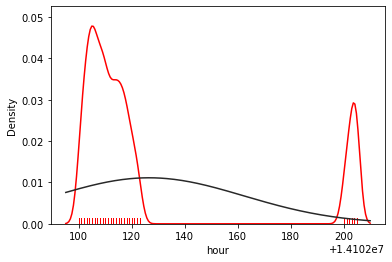

In [9]:
sns.distplot(df_train['hour'],hist=False,color ='r',rug=True , fit = norm)

In [28]:
df_train.hour.describe()

<ipython-input-28-a569a6cece48>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_train.hour.describe()


count                 2000000
unique                    240
top       2014-10-22 09:00:00
freq                    22201
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

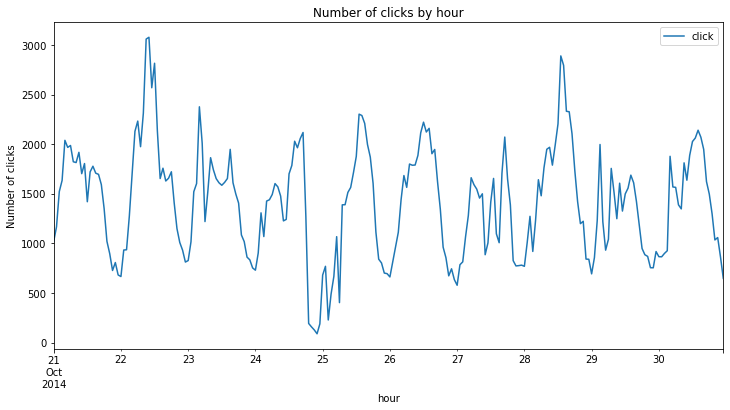

In [30]:
#As we can see in above result that the data covers 10 days of data
#now let us check hourly pattern for these days data

df_train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

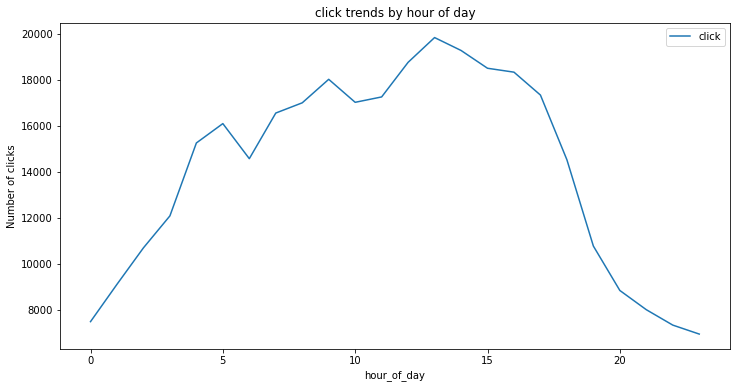

In [31]:
#click trends by hour of the day
##Here I am just trying to plot graph between click trends on hourly basis, basically to figure out which hour the clicks are more
df_train['hour_of_day'] = df_train.hour.apply(lambda x: x.hour)
df_train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

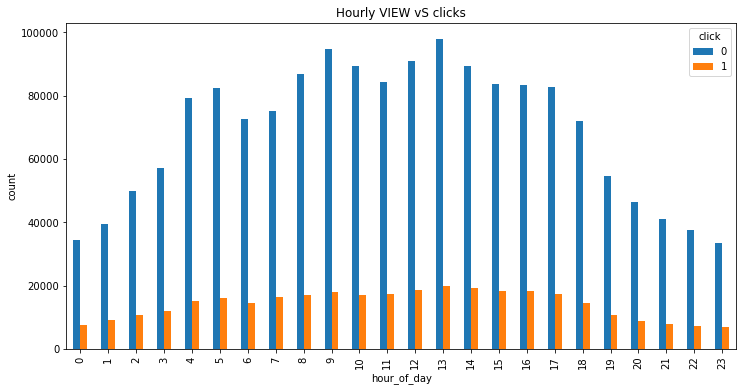

In [32]:
#hourly VIEW vs click
## How many views per hour vs how many clicks per hour.
df_train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly VIEW vS clicks');

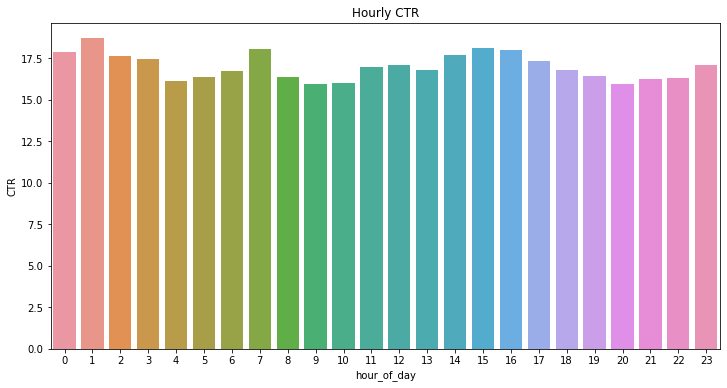

In [34]:
#here I am trying to get Hourly click through rate 
import seaborn as sns
df_click = df_train[df_train['click'] == 1]
df_hour = df_train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

In [57]:
#Please ignore next few cells , I was just trying to check some data type concepts in Pandas.
mydf=df_train.head(10)

In [105]:
mydf.dtypes

id                           int32
click                        int32
hour                datetime64[ns]
C1                           int32
banner_pos                   int32
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int32
device_conn_type             int32
C14                          int32
C15                          int32
C16                          int32
C17                          int32
C18                          int32
C19                          int32
C20                          int32
C21                          int32
day_of_week                 object
weakday                     object
Weekday                     object
dtype: object

In [58]:
mydf['hour']

0   2014-10-24 06:00:00
1   2014-10-29 15:00:00
2   2014-10-22 05:00:00
3   2014-10-21 14:00:00
4   2014-10-30 09:00:00
5   2014-10-27 17:00:00
6   2014-10-30 01:00:00
7   2014-10-29 01:00:00
8   2014-10-28 11:00:00
9   2014-10-28 16:00:00
Name: hour, dtype: datetime64[ns]

In [67]:
mydf['Weekday'] = mydf['hour'].dt.strftime("%A")

<ipython-input-67-d5e89773ca51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Weekday'] = mydf['hour'].dt.strftime("%A")


In [68]:
mydf['Weekday']

0       Friday
1    Wednesday
2    Wednesday
3      Tuesday
4     Thursday
5       Monday
6     Thursday
7    Wednesday
8      Tuesday
9      Tuesday
Name: Weekday, dtype: object

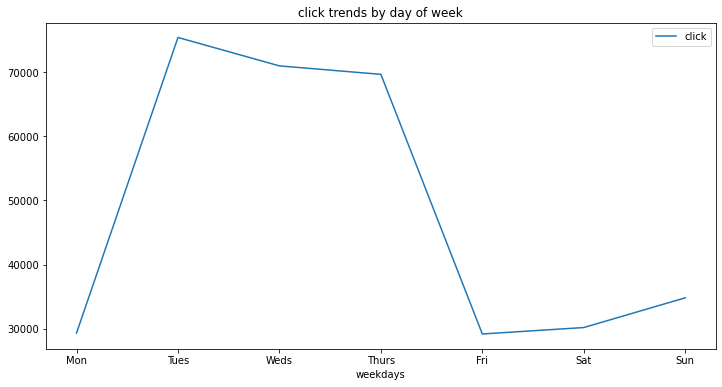

In [15]:
#click trends by day of week.
#we can see that the click is more between tuesdays to Thrusdays
df_train['weekdays'] = df_train['hour'].dt.strftime("%A")
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_train.groupby('weekdays').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

In [14]:
#Days of Week CTR
df_click = df_train[df_train['click'] == 1]
df_weekdays = df_train[['weekdays','click']].groupby(['weekdays']).count().reset_index()
df_weekdays = df_weekdays.rename(columns={'click': 'impressions'})
df_weekdays['clicks'] = df_click[['weekdays','click']].groupby(['weekdays']).count().reset_index()['click']
df_weekdays['CTR'] = df_weekdays['clicks']/df_weekdays['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='weekdays', data=df_weekdays, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

KeyError: "['weekdays'] not in index"

In [7]:

#Modeling
#starting with Hash fucntion
#has function :
    # to convert object datatypes to hashmap so as to be more memory efficient while trianing the model.
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self


In [8]:
df_train = convert_obj_to_int(df_train)

In [76]:
df_train.head(10)

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int,weekdays_int
0,-1313665075,0,2014-10-24 06:00:00,1005,0,1,0,16615,320,50,...,-1846566870834945973,-7171411168465941533,-1761052694618411288,1992453671023808974,4985853820954588789,-8228322899026537562,-1769668582781720159,-6051951380338482924,549313531249,1618687049676899142
1,-560158682,0,2014-10-29 15:00:00,1005,1,1,0,17614,320,50,...,-5292969121698938167,-7171411168465941533,-1761052694618411288,1992453671023808974,4985853820954588789,-8228322899026537562,2580669050596071944,7632570102619300425,549313531235,-700096927929238214
2,1658722075,0,2014-10-22 05:00:00,1005,0,1,0,21790,320,50,...,-6969797154983783223,1573062616312574851,-1761052694618411288,1992453671023808974,4985853820954588789,-8228322899026537562,7423020033512299073,8296728781408814264,549313531256,-700096927929238214
3,1323747585,1,2014-10-21 14:00:00,1002,0,0,0,21747,320,50,...,7226932565097214973,9177014827598631630,3513072176476490919,1992453671023808974,4985853820954588789,-219430645550596900,-5013930131687112336,-5340789089546523714,549313531242,-6367952604714799641
4,1821290237,0,2014-10-30 09:00:00,1005,0,1,2,23950,320,50,...,7226932565097214973,9177014827598631630,-8943426853568408501,2467735495339447790,-1383012668541581838,-8228322899026537562,-6936789439841563675,43708633813855954,549313531245,-7950402362258764057
5,-1542887571,0,2014-10-27 17:00:00,1005,1,1,0,17264,320,50,...,1229813582785391651,-7171411168465941533,-1761052694618411288,1992453671023808974,4985853820954588789,-8228322899026537562,-8389968683079888919,8158193593162475564,549313531220,4327782945793891879
6,219664221,1,2014-10-30 01:00:00,1005,0,1,2,23725,320,50,...,7226932565097214973,9177014827598631630,7275845245930145752,-5283637084659107736,5718928888038328361,-8228322899026537562,-4726873320917188280,7860646073634452325,549313531231,-7950402362258764057
7,1755635400,0,2014-10-29 01:00:00,1005,0,1,0,22257,320,50,...,-36405891957323948,1573062616312574851,-1761052694618411288,1992453671023808974,4985853820954588789,-8228322899026537562,-8940501009141866986,-1938478484354976105,549313531206,-700096927929238214
8,-1469717094,0,2014-10-28 11:00:00,1005,0,1,2,23143,320,50,...,7226932565097214973,9177014827598631630,2946384138675287926,-5283637084659107736,-2251539626626012637,-8228322899026537562,6492244815107988104,-7853987878438287762,549313531209,-6367952604714799641
9,-1524586333,0,2014-10-28 16:00:00,1005,0,1,0,23405,320,50,...,-5292969121698938167,-7171411168465941533,-1761052694618411288,1992453671023808974,4985853820954588789,-8228322899026537562,8730371397994394156,5040604352118264981,549313531312,-6367952604714799641


In [49]:
df_train['hour'].describe()

<ipython-input-49-9e7a87d1f265>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_train['hour'].describe()


count                 2000000
unique                    240
top       2014-10-22 09:00:00
freq                    22201
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

In [40]:
import numpy as np
df_train['hour'] = pd.to_numeric(df["hour"])

In [17]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,6653227553659228109,0,14102406,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,...,1,0,16615,320,50,1863,3,39,-1,23
1,14237893487069276198,0,14102915,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17614,320,50,1993,2,1063,100084,33
2,1256834335867016987,0,14102205,1005,0,bb4524e7,d733bbc3,28905ebd,ecad2386,7801e8d9,...,1,0,21790,320,50,2513,3,35,100188,68
3,4768871205625579777,1,14102114,1002,0,85f751fd,c4e18dd6,50e219e0,255a58c8,7801e8d9,...,0,0,21747,320,50,2504,3,41,100160,111
4,2813443321480785661,0,14103009,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,2,23950,320,50,2745,2,163,100176,255


In [9]:
df_train.drop('hour', axis=1, inplace=True)
df_train.drop('id', axis=1, inplace=True)

In [10]:
import lightgbm as lgb

X_train = df_train.loc[:, df_train.columns != 'click']
y_target = df_train.click.values


In [11]:
#create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}



In [12]:
X_train.dtypes
df_train.dtypes

click                int32
C1                   int32
banner_pos           int32
device_type          int32
device_conn_type     int32
C14                  int32
C15                  int32
C16                  int32
C17                  int32
C18                  int32
C19                  int32
C20                  int32
C21                  int32
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_id_int        int64
device_ip_int        int64
device_model_int     int64
dtype: object

In [40]:
newdf=df_train[df_train.index == 3]
newdf.drop('click',axis=1 , inplace = True)
newdf

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,C21,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
3,1002,0,0,0,21747,320,50,2504,3,41,...,111,5382465720375029149,-7124086855069148253,-4531693914867314231,7267031688210103517,-1703819627405932192,3478987067676105274,600626617347366173,2644784947286605210,4369212660600373076


In [45]:
newdf=df_train[df_train.index == 6]
newdf


,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,...,C21,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
6,1,1005,0,1,2,23725,320,50,2716,3,...,23,5382465720375029149,-7124086855069148253,-4531693914867314231,-1369454789944713339,-8044838031954116508,946036399323025517,315977324050320022,149312395849906379,4018095787914120738


In [59]:
df_train.iloc[6]

click                                  1
C1                                  1005
banner_pos                             0
device_type                            1
device_conn_type                       2
C14                                23725
C15                                  320
C16                                   50
C17                                 2716
C18                                    3
C19                                   47
C20                                   -1
C21                                   23
site_id_int          5382465720375029149
site_domain_int     -7124086855069148253
site_category_int   -4531693914867314231
app_id_int          -1369454789944713339
app_domain_int      -8044838031954116508
app_category_int      946036399323025517
device_id_int         315977324050320022
device_ip_int         149312395849906379
device_model_int     4018095787914120738
Name: 6, dtype: int64

In [46]:
newdf.drop('click',axis=1 , inplace = True)
newdf

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,C21,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
6,1005,0,1,2,23725,320,50,2716,3,47,...,23,5382465720375029149,-7124086855069148253,-4531693914867314231,-1369454789944713339,-8044838031954116508,946036399323025517,315977324050320022,149312395849906379,4018095787914120738


In [23]:
data.drop('click', axis=1, inplace=True)
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,...,C21,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
0,1005,0,1,0,16615,320,50,1863,3,39,...,23,-627414150807024862,-8013736861366969512,-7237484144746293107,-5752108538794584091,-1703819627405932192,3478987067676105274,315977324050320022,2464486408351110891,1801784579544342213


In [18]:
data=df_train.head(1)

In [13]:
#Now let us train the model
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=40,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.195557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.450159
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.445987
[3]	valid_0's binary_logloss: 0.442461
[4]	valid_0's binary_logloss: 0.439554
[5]	valid_0's binary_logloss: 0.437014
[6]	valid_0's binary_logloss: 0.434585
[7]	valid_0's binary_logloss: 0.432656
[8]	valid_0's binary_logloss: 0.430722
[9]	valid_0's binary_logloss: 0.429151
[10]	valid_0's binary_logloss: 0.427535
[11]	valid_0's binary_logloss: 0.426142
[12]	valid_0's binary_logloss: 0.425027
[13]	valid_0's binary_logloss: 0.423932
[14]	valid_0's binary_logloss: 0.423025
[15]	valid_0's binary_logloss: 0.422121
[16]	valid_0's binary_logloss: 0.42129
[17]	valid_0's binary_logloss: 0.420363
[18]	valid_0's binary_l

In [24]:
gbm.predict(data)

array([0.19320239])

In [48]:
gbm.predict(newdf)

array([0.25514741])

In [50]:
import pickle

In [51]:
pickle.dump(gbm,open('model.pkl','wb'))

In [52]:
mymodel = pickle.load(open('model.pkl','rb'))

In [53]:
mymodel.predict(newdf)

array([0.25514741])

In [14]:
print(gbm.best_score)


defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.4114761263689332)])})


In [116]:
print(gbm.best_iteration)

1645


# Phase 4 : Advance Modeling and Feature Analysis


### Advnace feature Analysis ###
There were few features left to analyse in previous phases which were complex and not direct. In this phase we'll be analysing those features.

In [8]:
#Banner Position
print(df_train.banner_pos.value_counts()/len(df_train))

0    0.719973
1    0.278291
7    0.001044
2    0.000306
4    0.000194
5    0.000154
3    0.000038
Name: banner_pos, dtype: float64


In [9]:
banner_pos = df_train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=df_train.loc[np.where((df_train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.1640589299876523
for banner position: 1,  click through rate: 0.18408069251251388
for banner position: 2,  click through rate: 0.11601307189542484
for banner position: 3,  click through rate: 0.19736842105263158
for banner position: 4,  click through rate: 0.18041237113402062
for banner position: 5,  click through rate: 0.1525974025974026
for banner position: 7,  click through rate: 0.3271072796934866


In [10]:
#we can see that for position 0 72 percent data is there and the CTR is .16 whereas for position 1 27 percent data and ctr is .18
#now let us put this info in histogram for better visualization

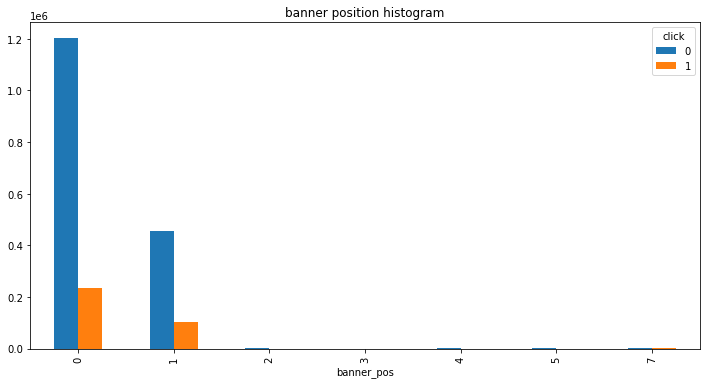

In [12]:
df_train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

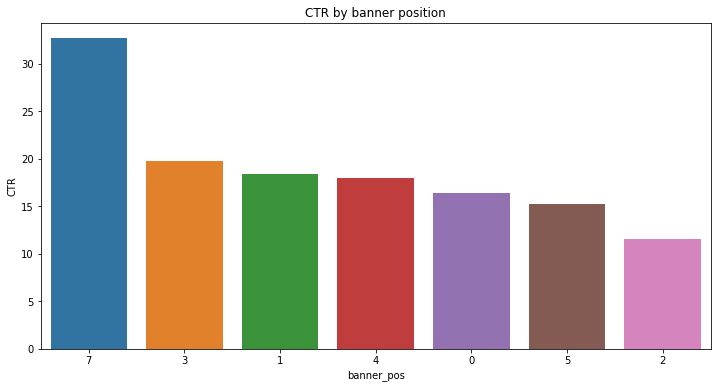

In [16]:
df_banner = df_train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [ ]:
# Advance Machine learning Model 
# going to use xgboost for advance ML model

In [54]:
# listing down all features
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int']

In [55]:
#importing all libraries for xgboost
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(df_train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(df_train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    #calling the xgboost train module
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    
    
run_default_test(df_train, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[23:29:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.64899	eval-logloss:0.64897
[1]	train-logloss:0.61290	eval-logloss:0.61288
[2]	train-logloss:0.58279	eval-logloss:0.58277
[3]	train-logloss:0.55792	eval-logloss:0.55789
[4]	train-logloss:0.53706	eval-logloss:0.53701
[5]	train-logloss:0.51952	eval-logloss:0.51948
[6]	train-logloss:0.50456	eval-logloss:0.50452
[7]	train-logloss:0.49191	eval-logloss:0.49187
[8]	train-logloss:0.48120	eval-logloss:0.48115
[9]	train-logloss:0.47216	eval-logloss:0.47210
[10]	train-logloss:0.46441	eval-logl

[160]	train-logloss:0.40378	eval-logloss:0.40473
[161]	train-logloss:0.40375	eval-logloss:0.40471
[162]	train-logloss:0.40370	eval-logloss:0.40466
[163]	train-logloss:0.40364	eval-logloss:0.40460
[164]	train-logloss:0.40360	eval-logloss:0.40457
[165]	train-logloss:0.40357	eval-logloss:0.40454
[166]	train-logloss:0.40354	eval-logloss:0.40452
[167]	train-logloss:0.40348	eval-logloss:0.40447
[168]	train-logloss:0.40344	eval-logloss:0.40444
[169]	train-logloss:0.40340	eval-logloss:0.40440
[170]	train-logloss:0.40336	eval-logloss:0.40437
[171]	train-logloss:0.40331	eval-logloss:0.40433
[172]	train-logloss:0.40330	eval-logloss:0.40431
[173]	train-logloss:0.40327	eval-logloss:0.40430
[174]	train-logloss:0.40322	eval-logloss:0.40426
[175]	train-logloss:0.40318	eval-logloss:0.40423
[176]	train-logloss:0.40313	eval-logloss:0.40419
[177]	train-logloss:0.40312	eval-logloss:0.40418
[178]	train-logloss:0.40308	eval-logloss:0.40414
[179]	train-logloss:0.40307	eval-logloss:0.40413
[180]	train-logloss:

# Phase 5 Model deployment and productionization


In [ ]:
import pickle

In [56]:
pickle.dump(gbm,open('ctrmodel.pkl','wb'))


In [1]:
ctr_model = pickle.load(open('ctrmodel.pkl','rb'))


NameError: name 'pickle' is not defined

In [ ]:
ctr_model.predict(newdf)